In [1]:
# 데이터 구성: Series, DataFrame
import pandas as pd

# 행렬 연산
import numpy as np

# 데이터 시각화
import matplotlib; import matplotlib.pyplot as plt

# 데이터 시각화: 추세, 산점도 행렬
import seaborn as sns

# Scale 변환: 평균, 표준편차 기준
from sklearn.preprocessing import StandardScaler

# 주성분 분석
from sklearn.decomposition import PCA

# 회귀분석
import statsmodels.api as sm

from sklearn.model_selection import train_test_split


### step 1 데이터 구성하기

In [2]:
# 파일명, 변수, 값 등에 한글 포함시 engine = "python"으로 지정
# df_raw= pd.read_csv("/home/pirl/test/BigData/직무능력평가.csv", encoding='euc-kr')
# df_raw.head()
# 파일명, 변수, 값 등에 한글 포함시 engine = "python"으로 지정
df_raw= pd.read_csv("/home/pirl/test/BigData/직무능력평가.csv", encoding='euc-kr')
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [3]:
# 데이터 분리(Y, Xs) -> 설명변수를 이용한 주성분 분석
df_raw_x = df_raw.drop("EVAL", axis = 1)
df_raw_y = df_raw["EVAL"]
df_raw_y.head()

0    43
1    63
2    71
3    61
4    81
Name: EVAL, dtype: int64

In [4]:
df_raw_x.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,51,30,39,61,92,45
1,64,51,54,63,73,47
2,70,68,69,76,86,48
3,63,45,47,54,84,35
4,78,56,66,71,83,47


### step 2 선형관계 확인: 산점도 및 상관계수

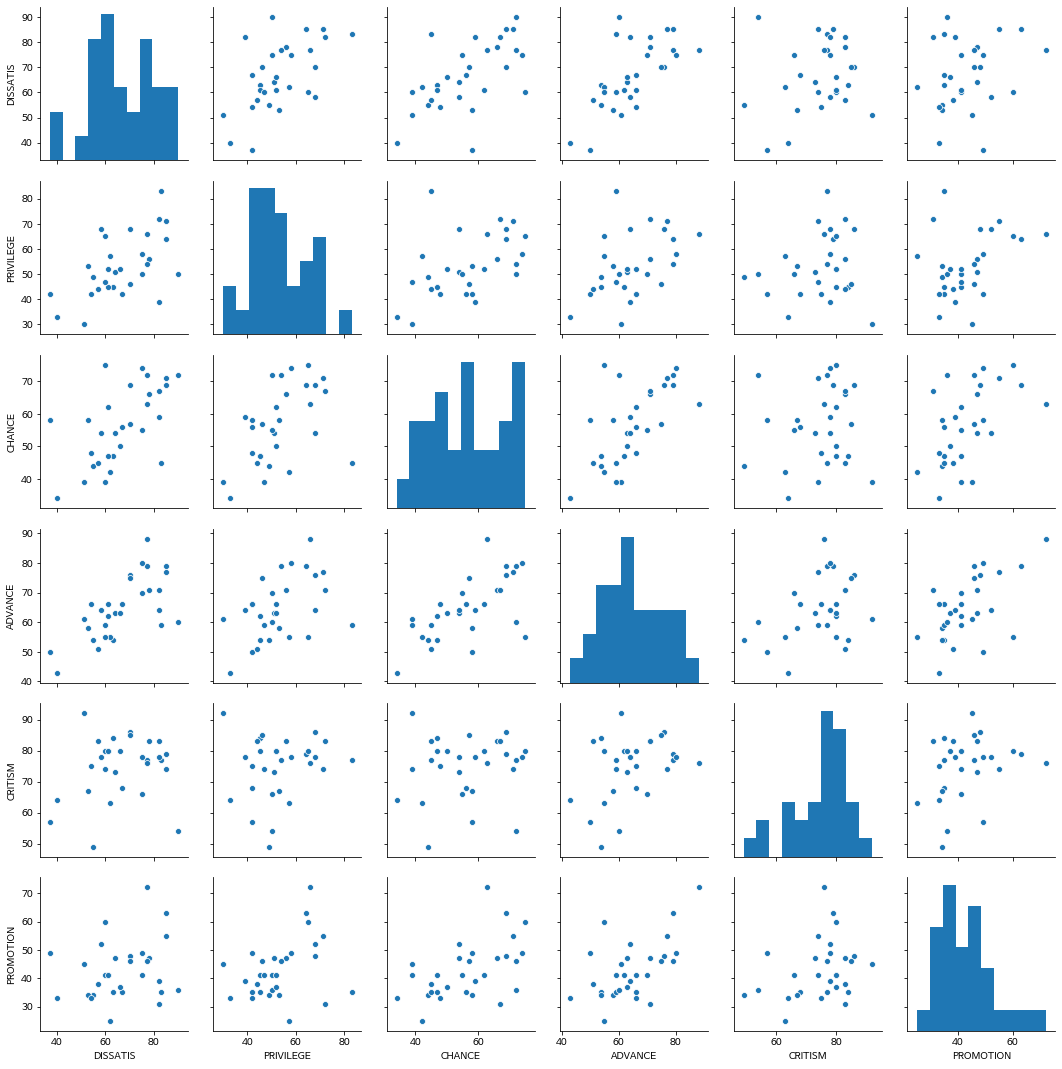

In [5]:
# 산점도 행렬
sns.pairplot(df_raw_x)

In [6]:
# Pearson 상관계수, pearson, kendall, spearman
df_raw_x.corr().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


### step 3 데이터 확인 및 Scaling

In [7]:
# 요약 통계량 -> Scale 변환 필요 확인
df_raw_x.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,66.600,53.133,56.367,64.633,74.767,42.933
std,13.315,12.235,11.737,10.397,9.895,10.289
min,37.000,30.000,34.000,43.000,49.000,25.000
25%,58.500,45.000,47.000,58.250,69.250,35.000
50%,65.000,51.500,56.500,63.500,77.500,41.000
75%,77.000,62.500,66.750,71.000,80.000,47.750
max,90.000,83.000,75.000,88.000,92.000,72.000


In [8]:
# 변수 이름 저장
x_cols = df_raw_x.columns
# Scale 변환: ndarray 형식
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
# 새로운 test data는 fit_transform(df_raw_x)이 아닌, transform(df_raw_x) 시킨다.

# 변환된 데이터 및 형태 확인
print("Scaled Data: \n{}".format(nd_scaled[:5].round(3)))
print("Shape:\n {}".format(nd_scaled.shape))

Scaled Data: 
[[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
Shape:
 (30, 6)


In [9]:
# DateFame으로 저장
df_scaled = pd.DataFrame(nd_scaled, columns = x_cols)
df_scaled.head().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,-1.192,-1.923,-1.505,-0.355,1.771,0.204
1,-0.199,-0.177,-0.205,-0.160,-0.182,0.402
2,0.260,1.236,1.095,1.112,1.155,0.501
3,-0.275,-0.676,-0.812,-1.040,0.949,-0.784
4,0.871,0.238,0.835,0.623,0.846,0.402


In [10]:
# Scaled 변환 데이터 요약 통계량
df_scaled.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017
min,-2.261,-1.923,-1.938,-2.116,-2.649,-1.773
25%,-0.619,-0.676,-0.812,-0.624,-0.567,-0.784
50%,-0.122,-0.136,0.012,-0.111,0.281,-0.191
75%,0.794,0.779,0.900,0.623,0.538,0.476
max,1.787,2.483,1.615,2.286,1.771,2.873


### step 4 주성분 분석

In [11]:
# 주성분 분석: 주성분1(Prin1) ~ 주성분6(Prin6) 생성 및 저장
pca = PCA(n_components = 6)
nd_pca = pca.fit_transform(df_scaled)
# 생성된 주성분 점수 확인
print("PCA DATA :\n {}".format(nd_pca[:5]))
# 생성된 주성분 점수 Row, Column 개수 확인
print("Shape :\n {}".format(nd_pca.shape))# 파일명, 변수, 값 등에 한글 포함시 engine = "python"으로 지정

PCA DATA :
 [[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]
Shape :
 (30, 6)


,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,42,41,20,49,51,52,35
1,53,74,61,54,33,63,57
2,61,10,66,63,66,36,48


### 주성분 분석 및 결과: 주성분 점수

In [12]:
# 주성분 점수 저장:(Prin1~Prin6, DataFrame형식) 및 확인
df_pca = pd.DataFrame(nd_pca, columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])
# 주성분 분석용 데이터와 주성분 점수 
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461


In [13]:
### 주성분 분석 통계량 저장: 주성분 번호, Eigenvalue, Eigenvalue ratio
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [I for I in range(1,7)]
df_pca_stat["EignenValues"] = pca.explained_variance_
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EignenValues,EigenValueRatio,CumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


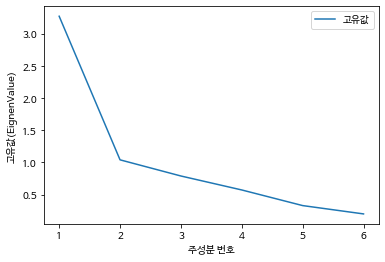

In [14]:
# Scree Plot
plt.plot(df_pca_stat["PrinNo"],df_pca_stat["EignenValues"], label ="고유값" )

# 그래프 label, legend 설정
plt.ylabel("고유값(EignenValue)")
plt.xlabel("주성분 번호")
plt.legend(loc = "best")

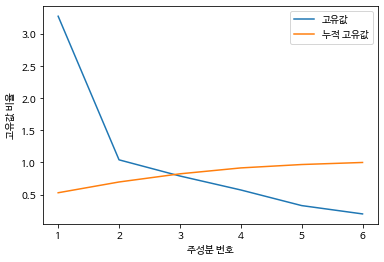

In [15]:
# 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"],
         df_pca_stat["EignenValues"], label ="고유값" )
# 누적된 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"],
         df_pca_stat["CumEigenValueRatio"], label ="누적 고유값" )
plt.ylabel("고유값 비율")
plt.xlabel("주성분 번호")
plt.legend(loc = "best")

### 주성분 분석 및 결과: 고유 벡터(Eignvector) 확인 및 해석

In [16]:
# 주성분 분석 데이터의 변수 이름
x_cols = pd.DataFrame({"Feature": df_raw_x.columns})
# 주성분 Prin 1~6까지의 고유벡터 저장
# 전치 결과 pd.DataFrame(pca.components_, columns = ["Prin1", "Prin2", "Prin3","Prin4", "Prin5", "Prin6" ], axis = 1)
# 파이썬 PCA 분석 시 SVD 연산 방식의 차이 반영
df_eignenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1, \
                                                 columns = ["Prin1", "Prin2", "Prin3", "Prin4", "Prin5", "Prin5"])], axis = 1)
df_eignenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin5
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


### 주성분 상관/회귀분석: 상관관계

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


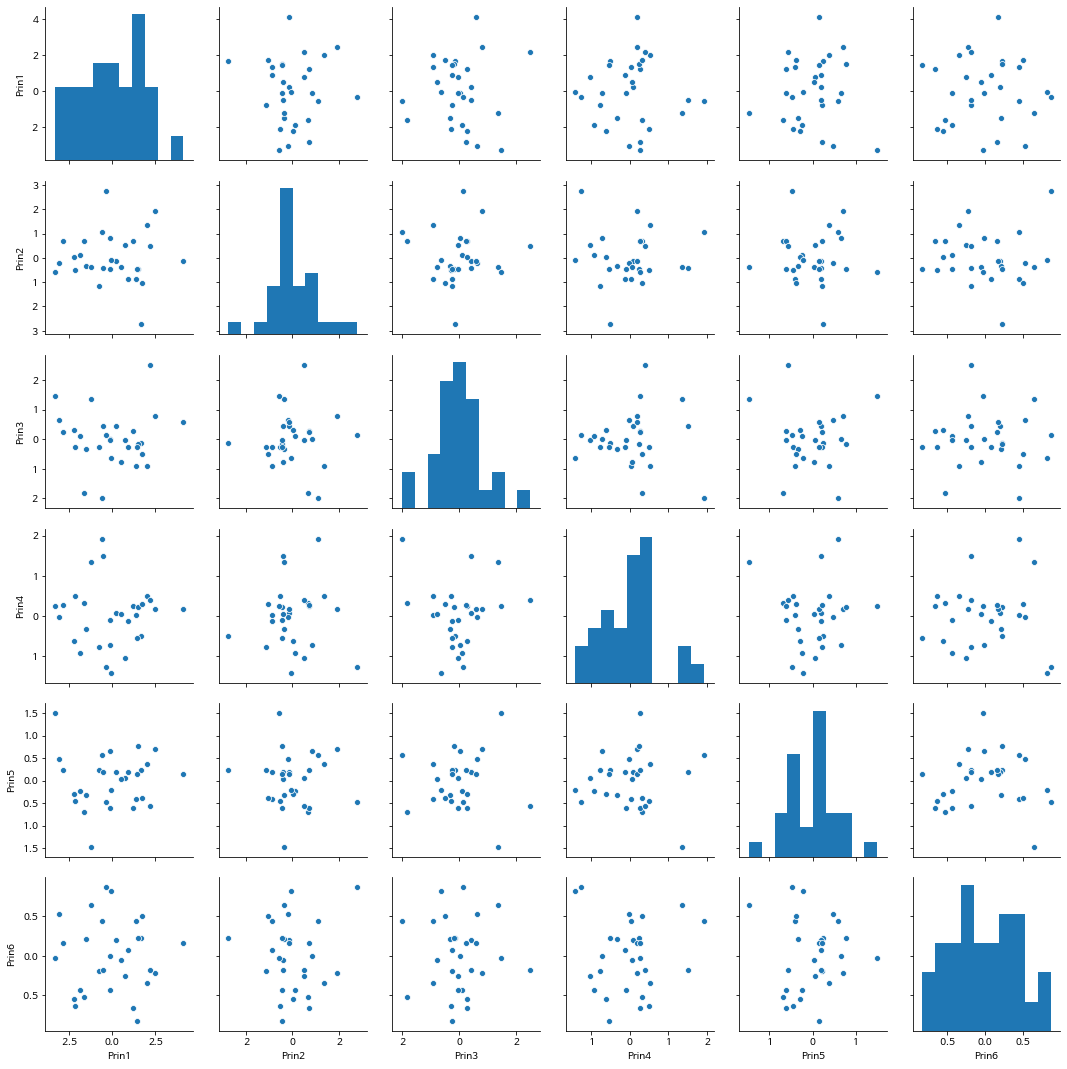

In [17]:
# 산점도 행렬
sns.pairplot(df_pca)

In [18]:
# 상관계수
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,-0.0,-0.0,0.0
Prin2,0.0,1.0,0.0,-0.0,-0.0,0.0
Prin3,-0.0,0.0,1.0,0.0,0.0,-0.0
Prin4,-0.0,-0.0,0.0,1.0,-0.0,-0.0
Prin5,-0.0,-0.0,0.0,-0.0,1.0,-0.0
Prin6,0.0,0.0,-0.0,-0.0,-0.0,1.0


### step 5 주성분 상관/회귀분석: 회귀분석

In [19]:
# 다중 선형 회귀분석:원천 데이터 활용
# 원천 데이터에 절편(const) 추가
df_raw_x_const = sm.add_constant(df_raw_x)
# 회귀모델 생성
reg_model = sm.OLS(df_raw_y, df_raw_x_const)
# 회귀모델 적합
reg_model = reg_model.fit()
# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           1.24e-05
Time:                        17:28:32   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,42,41,20,49,51,52,35
1,53,74,61,54,33,63,57
2,61,10,66,63,66,36,48


In [20]:
# 다중선형 주성분 회귀분석: 주성분 점수(Score) 데이터 활용
# Eigenvalue, Scree plot 기준으로 적정 주성분 선택e indices for endog and exog are not aligned
x_var = ["Prin1", "Prin2", "Prin3"]

# 선택된 주성분
df_pca_const = sm.add_constant(df_pca[x_var])

# 회귀모델 생성
reg_model = sm.OLS(df_raw_y, df_pca_const)

# 회귀모델 적합
reg_model = reg_model.fit()

# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           1.02e-05
Time:                        17:28:32   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0

# 추가적인 데이터(test)가 왔을 때 예측

In [21]:
# 파일명, 변수, 값 등에 한글 포함시 engine = "python"으로 지정
# df_raw= pd.read_csv("/home/pirl/test/BigData/직무능력평가.csv", encoding='euc-kr')
# df_raw.head()
# 파일명, 변수, 값 등에 한글 포함시 engine = "python"으로 지정
test= pd.read_csv("/home/pirl/test/BigData/jik.csv", encoding='euc-kr')
test.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,42,41,20,49,51,52,35
1,53,74,61,54,33,63,57
2,61,10,66,63,66,36,48


In [22]:
# 데이터 분리(Y, Xs) -> 설명변수를 이용한 주성분 분석
test_x = test.drop("EVAL", axis = 1)
test_y = test["EVAL"]

In [23]:
trans_x = scaler.transform(test_x)

In [24]:
# 주성분 분석 새로운 데이터 들어왔을 때 적용
pca = PCA(n_components = 6)
result = pca.fit(df_scaled)
pca_tested = result.transform(trans_x)

In [25]:
pca_tested

array([[ 3.72269526,  0.68264513,  1.83474668, -1.39113604, -0.1208959 ,
        -0.21736211],
       [ 0.85504997,  1.21597207,  1.07560713,  1.69535669, -0.42899894,
         2.70864231],
       [ 1.85152758,  2.12401026,  4.01373182,  1.76462283,  0.10663371,
        -3.02332295]])

In [26]:
pca_tested_one = sm.add_constant(pca_tested)

In [27]:
pca_tested_one

array([[ 1.        ,  3.72269526,  0.68264513,  1.83474668, -1.39113604,
        -0.1208959 , -0.21736211],
       [ 1.        ,  0.85504997,  1.21597207,  1.07560713,  1.69535669,
        -0.42899894,  2.70864231],
       [ 1.        ,  1.85152758,  2.12401026,  4.01373182,  1.76462283,
         0.10663371, -3.02332295]])

In [28]:
predict_y = reg_model.predict(pca_tested_one[:,0:4])

In [29]:
predict_y

array([42.55009708, 60.45212561, 47.03490907])